In [1]:
from mylib import *
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris_features = pd.DataFrame(data = iris_dataset.data, columns = iris_dataset.feature_names)
df_iris_target = pd.DataFrame(data = iris_dataset.target, columns = ['class'])

In [2]:
#normalize
from sklearn.preprocessing import MinMaxScaler
iris_scaler = MinMaxScaler()
iris_scaler.fit(df_iris_features)
nd_iris_features = iris_scaler.transform(df_iris_features)
df_iris_features_normalized = pd.DataFrame(data=nd_iris_features, columns = df_iris_features.columns)

In [3]:
#split
iris_split = train_test_split(df_iris_features_normalized, df_iris_target,
                             test_size=0.25, random_state=17)
df_iris_features_train = iris_split[0]
df_iris_features_test = iris_split[1]
df_iris_target_train = iris_split[2]
df_iris_target_test = iris_split[3]

In [5]:
#softmax classifier
from sklearn.linear_model import LogisticRegression
softmax_logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='lbfgs',
                                        multi_class = 'multinomial')
softmax_logit_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

LogisticRegression(multi_class='multinomial')

In [6]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
mc_dtree_model = DecisionTreeClassifier(max_depth=4)
mc_dtree_model.fit(df_iris_features_train, df_iris_target_train.values.ravel())

DecisionTreeClassifier(max_depth=4)

In [7]:
#pred
softmax_logit_predictions = softmax_logit_model.predict(df_iris_features_test)
mc_predictions = mc_dtree_model.predict(df_iris_features_test)

In [9]:
from sklearn.metrics import confusion_matrix #혼동 행렬 생성
cm_softmax = confusion_matrix(df_iris_target_test.values.ravel(), softmax_logit_predictions)
cm_mc_dtree = confusion_matrix(df_iris_target_test.values.ravel(), mc_predictions)

In [10]:
print(cm_softmax)
print(cm_mc_dtree)

[[10  0  0]
 [ 0 14  1]
 [ 0  1 12]]
[[10  0  0]
 [ 0 15  0]
 [ 0  1 12]]


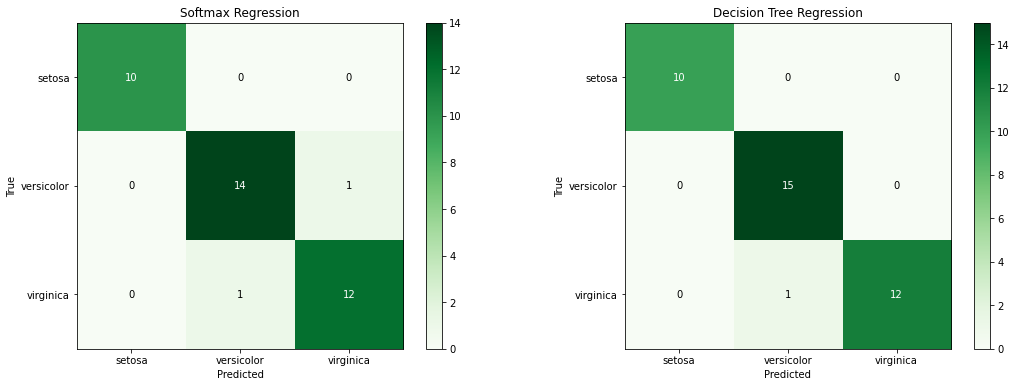

In [11]:
def plot_confusion_matrix(cmatrix, class_labels, axes, title, cmap):
    heatmap_image = axes.imshow(cmatrix, interpolation='nearest', cmap=cmap)
    axes.figure.colorbar(heatmap_image, ax=axes)
    
    num_rows = cmatrix.shape[0]
    num_cols = cmatrix.shape[1]
    
    axes.set_title(title)
    axes.set_xlabel("Predicted")
    axes.set_ylabel("True")
    
    axes.set_xticks(np.arange(num_cols))
    axes.set_yticks(np.arange(num_rows))
    axes.set_xticklabels(class_labels)
    axes.set_yticklabels(class_labels)
    
    thresh = cmatrix.max() / 2.
    for y in range(num_rows):
        for x in range(num_cols):
            axes.text(x, y, format(cmatrix[y, x], '.0f'),
                     ha='center', va='center',
                     color='white' if cmatrix [y, x] > thresh else 'black')
            
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plot_confusion_matrix(cm_softmax,
                     iris_dataset.target_names, axes[0],
                     "Softmax Regression",
                     plt.cm.Greens)
plot_confusion_matrix(cm_mc_dtree,
                     iris_dataset.target_names, axes[1],
                     "Decision Tree Regression",
                     plt.cm.Greens)

In [12]:
#iris dataset -> grid search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'presort': [True, False]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                          param_grid = grid_params, scoring = 'accuracy',
                          cv=10, n_jobs=-1)
grid_search.fit(df_iris_features.values, df_iris_target)

ValueError: Invalid parameter presort for estimator DecisionTreeClassifier(max_depth=2, max_features='auto'). Check the list of available parameters with `estimator.get_params().keys()`.